In [2]:
pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.2 MB/s eta 0:00:00 MB/s eta 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [7]:
df = pd.read_csv('imdb_top_1000.csv')

In [5]:
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [14]:
df.shape

(2541, 16)

In [130]:
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre')
 # df.head()
df['Genre'].value_counts()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,Decade,Genre_Label
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994.0,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469",1990.0,6
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175 min,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",1970.0,5
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972.0,A,175 min,Drama,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411",1970.0,6
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152 min,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",2000.0,0
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008.0,UA,152 min,Crime,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444",2000.0,5


In [21]:
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,2541.000000,2146.000000,2.541000e+03
mean,7.944904,77.758155,2.785272e+05
std,0.272106,12.360541,3.231904e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.742800e+04
50%,7.900000,79.000000,1.435250e+05
75%,8.100000,87.000000,3.880890e+05
max,9.300000,100.000000,2.343110e+06


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2541 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    2541 non-null   object 
 1   Series_Title   2541 non-null   object 
 2   Released_Year  2541 non-null   object 
 3   Certificate    2306 non-null   object 
 4   Runtime        2541 non-null   object 
 5   Genre          2541 non-null   object 
 6   IMDB_Rating    2541 non-null   float64
 7   Overview       2541 non-null   object 
 8   Meta_score     2146 non-null   float64
 9   Director       2541 non-null   object 
 10  Star1          2541 non-null   object 
 11  Star2          2541 non-null   object 
 12  Star3          2541 non-null   object 
 13  Star4          2541 non-null   object 
 14  No_of_Votes    2541 non-null   int64  
 15  Gross          2109 non-null   object 
dtypes: float64(2), int64(1), object(13)
memory usage: 337.5+ KB


## Subgenre Popularity Over Time

In [25]:
df.dropna(subset=['Released_Year', 'Genre'], inplace=True)
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

In [26]:
df['Decade'] = (df['Released_Year'] // 10) * 10

In [28]:
df['Decade'].value_counts()

Decade
2010.0    629
2000.0    624
1990.0    374
1980.0    218
1970.0    186
1960.0    173
1950.0    133
1940.0     93
1930.0     64
1920.0     29
2020.0     15
Name: count, dtype: int64

In [29]:
subgenre_counts = df.groupby(['Decade', 'Genre']).size().unstack().fillna(0)

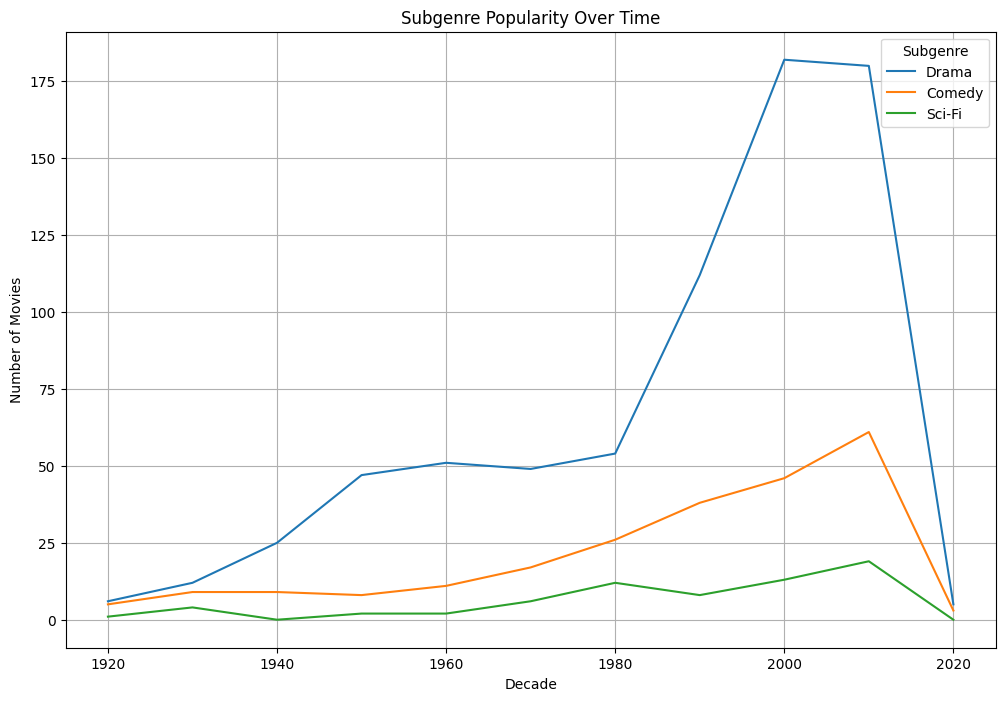

In [36]:
selected_genres = ['Drama', 'Comedy', 'Sci-Fi']
subgenre_counts[selected_genres].plot(kind='line', figsize=(12, 8))
plt.title('Subgenre Popularity Over Time')
plt.ylabel('Number of Movies')
plt.xlabel('Decade')
plt.legend(title='Subgenre')
plt.grid(True)
plt.show()

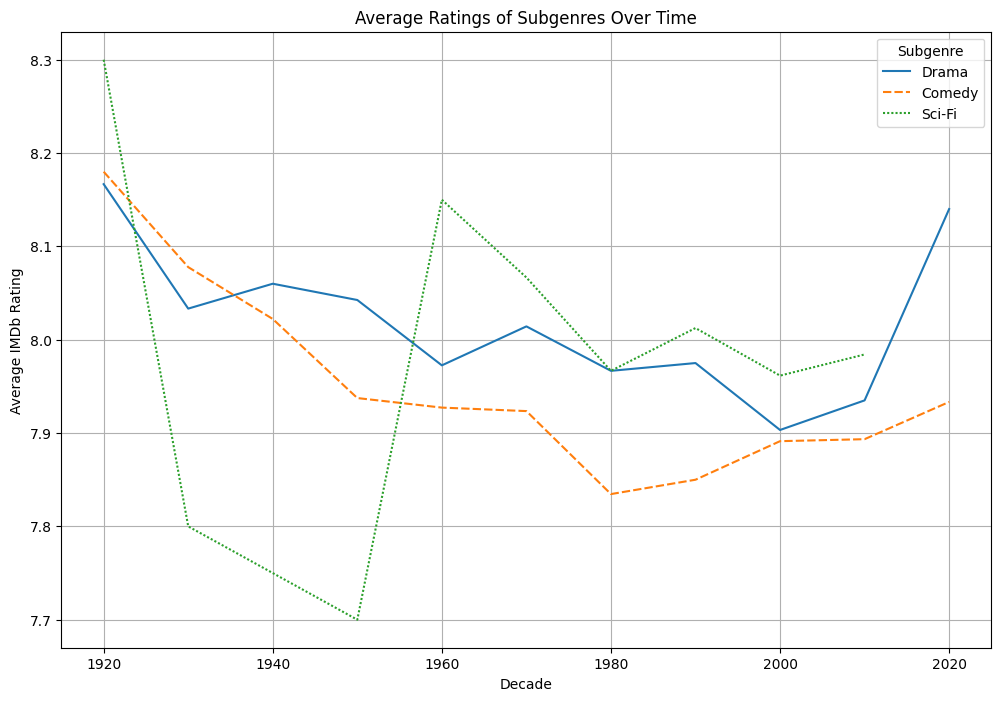

In [37]:
rating_by_genre = df.groupby(['Decade', 'Genre'])['IMDB_Rating'].mean().unstack()
plt.figure(figsize=(12, 8))
sns.lineplot(data=rating_by_genre[selected_genres])
plt.title('Average Ratings of Subgenres Over Time')
plt.ylabel('Average IMDb Rating')
plt.xlabel('Decade')
plt.legend(title='Subgenre')
plt.grid(True)
plt.show()

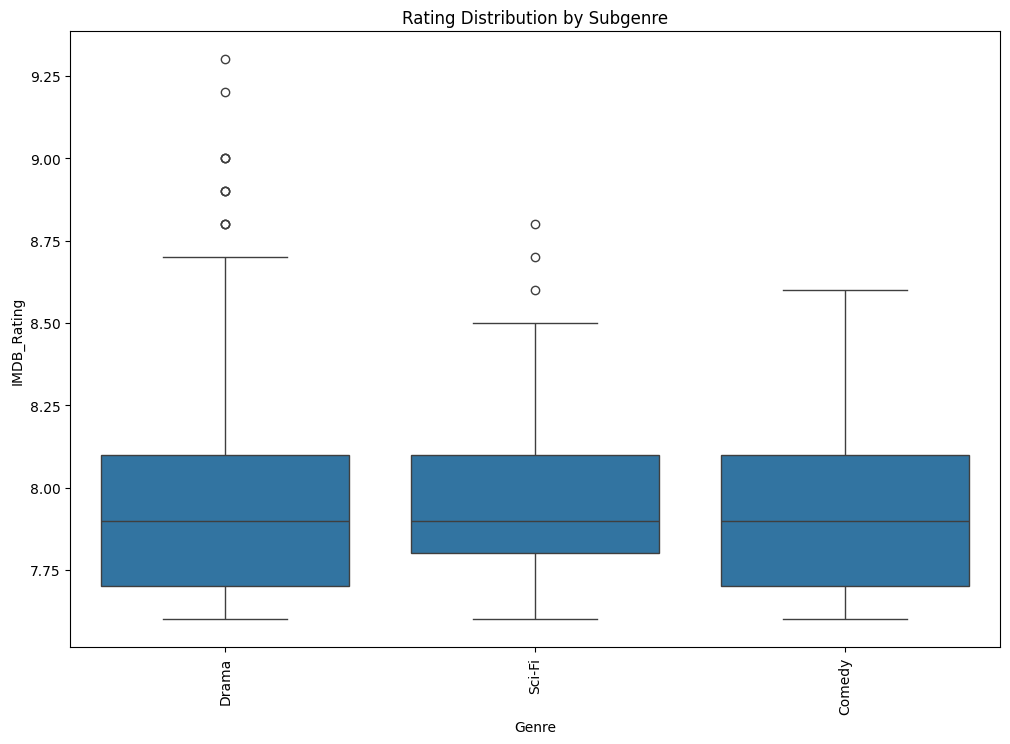

In [39]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='IMDB_Rating', data=df[df['Genre'].isin(selected_genres)])
plt.title('Rating Distribution by Subgenre')
plt.xticks(rotation=90)
plt.show()

## Exploring the Evolution of Movie Ratings: Do Newer Films Score Lower?

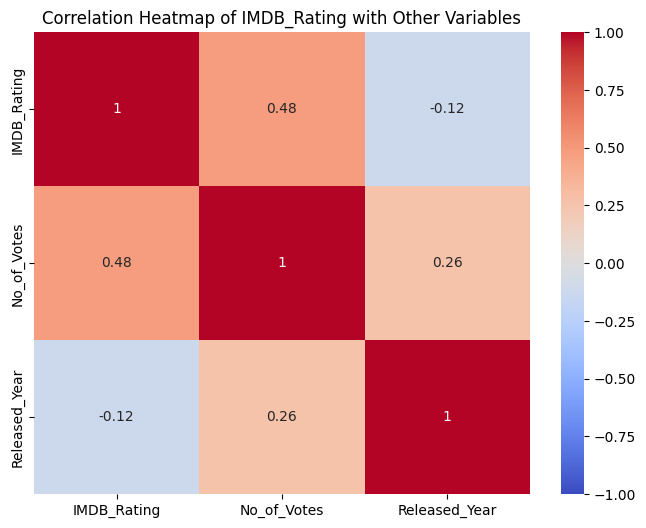

In [75]:
corr_matrix = df[['IMDB_Rating', 'No_of_Votes', 'Released_Year']].corr()

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

plt.title('Correlation Heatmap of IMDB_Rating with Other Variables')
plt.show()

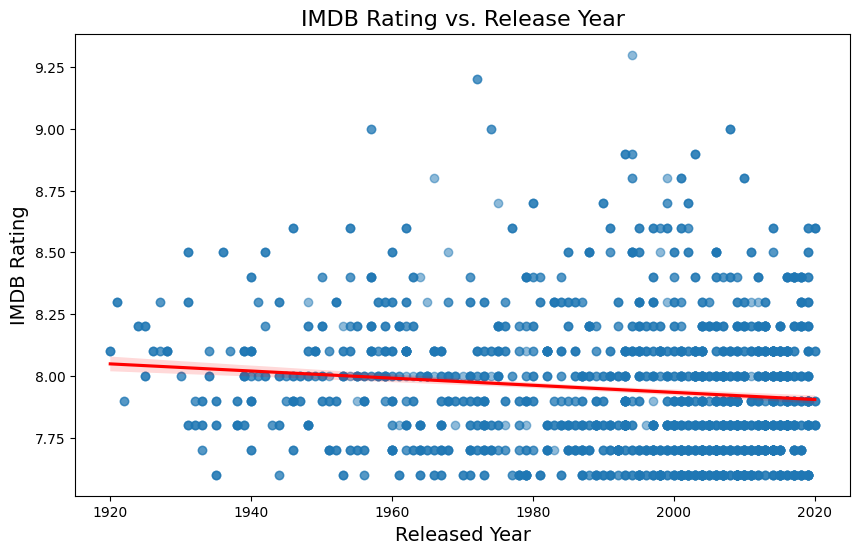

In [72]:
# Analysis 
# IMDB_Rating and No_of_Votes: movies with more votes tend to have higher ratings viceversa highly rated movies receive more votes from viewers.
# As the year increases, there’s a slight tendency for the IMDB ratings to decrease, newer movies tend to have lower ratings compared to older ones.

import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Released_Year', y='IMDB_Rating', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

# Add labels and title
plt.title('IMDB Rating vs. Release Year', fontsize=16)
plt.xlabel('Released Year', fontsize=14)
plt.ylabel('IMDB Rating', fontsize=14)

plt.show()


## Which subgenres might become more popular in the future

In [41]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [76]:
label_encoder = LabelEncoder()
df['Genre_Label'] = label_encoder.fit_transform(df['Genre'])

In [85]:
X = df[['Released_Year', 'Genre_Label']]
y = df['No_of_Votes']

In [99]:
from sklearn.model_selection import train_test_split

# Example of splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print(X_train.shape)
print(y_train.shape)


(2032, 2)
(2032,)


In [113]:
print(X.isnull().sum())
print(y.isnull().sum())

Released_Year    0
Genre_Label      0
dtype: int64
0


In [127]:
X_train= X.fillna(X.mean())

In [122]:
X_encoded = pd.get_dummies(X, columns=['Genre_Label'])
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X['Genre_Label'] = le.fit_transform(X['Genre_Label'])


In [128]:
model = LinearRegression()
model.fit(X_train, y_train)

ValueError: Found input variables with inconsistent numbers of samples: [2538, 2032]

In [107]:
y_pred = model.predict(X_test)

# Plotting predictions vs actual
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Votes')
plt.ylabel('Predicted Votes')
plt.title('Predicted vs Actual Movie Votes')
plt.grid(True)
plt.show()

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

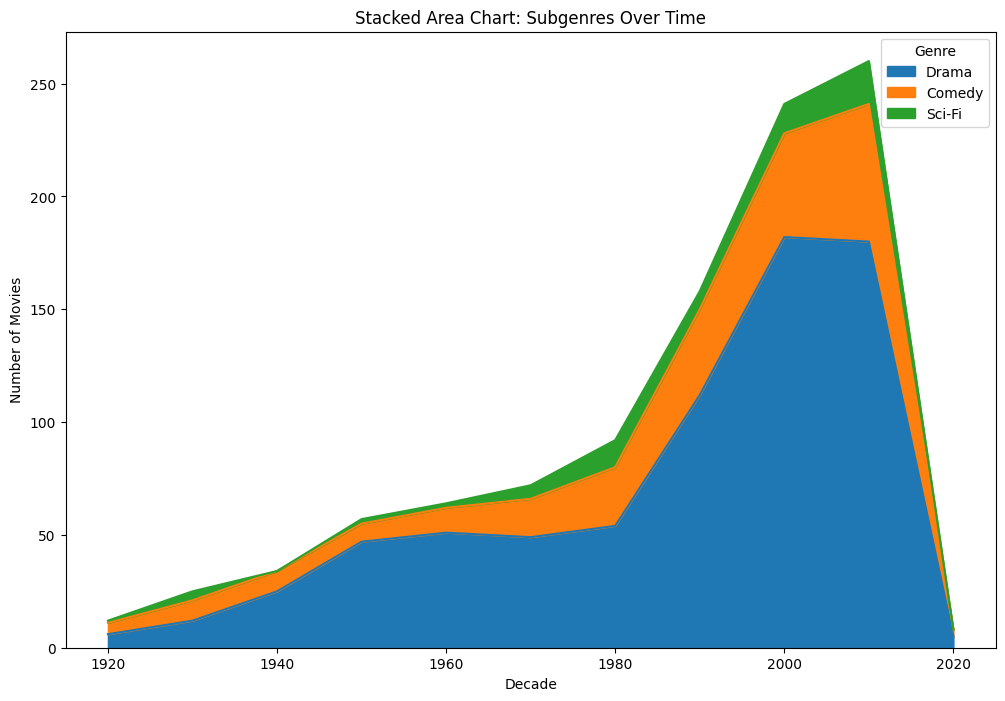

KeyError: 'Genres'

In [109]:
# Stacked Area Chart
subgenre_counts[selected_genres].plot(kind='area', figsize=(12, 8), stacked=True)
plt.title('Stacked Area Chart: Subgenres Over Time')
plt.ylabel('Number of Movies')
plt.xlabel('Decade')
plt.show()

# FacetGrid example: Ratings across decades for subgenres
g = sns.FacetGrid(df[df['Genre'].isin(selected_genres)], col="Decade", hue="Genres", col_wrap=4, height=3)
g.map(sns.histplot, "Rating", kde=False)
g.add_legend()
plt.show()